# Assignment 8: Mathematical modelling - model estimation
## Preliminaries

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.optimize as so
import pandas as pd 
import numpy as np
import seaborn as sns
df = pd.read_csv('possum.csv')

## Task 1: Robust regression ( / 20 pts)
### Question 1 ( / 13 pts)
Start with the function code that you wrote in homework 7. Modify the function simpleRegLossRSS to calculate the summed absolute deviation of the prediction from the data (instead of the residual sum-of-squares). Call this new function simpleRegLossSAD. Modify your simpleRegFit function (Task 3, Question 4) from Homework 7 to take a flexible loss function as a 3rd input argument. Now call the function with your new loss function to calculate a regression line of tailL (y) against age (x) in the possum data set (see HW7). Your function simpleRegFit  should provide a plot of the fit. Compare the fit with the fit you achieved with the squared error (HW7, task 3, question 5). What do you observe?

R2 is 0.8518771134632673


Text(0, 0.5, 'Tail Length')

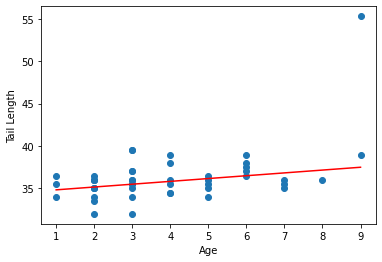

In [2]:
def simpleRegPredict(b,x):
    return b[0] + b[1]*x

def simpleRegLossSAD(b,x,y):
    predY = simpleRegPredict(b,x)
    res = y-predY
    sad = sum(np.abs(res))
    deriv = np.zeros(2)
    deriv[0]=-sum(np.sign(res))
    deriv[1]=-sum(np.sign(res)*x)
    return (sad,deriv)

def plotPrediction(b,x,y,predictFcn=simpleRegPredict):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x,y)
    xp = np.linspace(min(x),max(x),num=50)
    yp = predictFcn(b,xp)
    ax.plot(xp,yp,'r')

def simpleRegFit(x,y, lossF):
    RESULT = so.minimize(lossF, [0, 0], args = (x,y), jac = True)
    plotPrediction(RESULT.x,x,y)
    TSS = sum((y - np.mean(y))**2)
    R2 = 1-(RESULT.fun/TSS)
    print('R2 is',R2)
    
simpleRegFit(df.age,df.tailL,simpleRegLossSAD)
plt.xlabel("Age")
plt.ylabel("Tail Length")

> The fitted line is no longer affected by the outlier, so it fits the data much better.

### Question 2 ( / 7 pts)
Report the R2 for the fit using median regression (question 1). Compare it to the R2 value you got for the fit minimizing the squared error. Which one is lower? Why? Which fit is the better one? Which one will predict new data better?  

>As per last question, the R2 using median regression is 0.85, and the R2 in last assignment was 0.22. Clearly the median regression fit is better, probably due to lower errors with most points other than the outlier. The median regression fit is better and will predict data better, as it is much higher.

## Task 2: Nonlinear (polynomial) regression ( / 40 pts)
For this task, we will use a new data set (fertilizer.csv), which comes from an agricultural study. Each plot of the field (a 10m-by-10m square) was given a randomly determined concentration of fertilizer (in ml/week/m2). The harvest yield for grain in kg/patch was recorded. 
The data has two fields 
- fertCon: Concentration of fertilizer
- harvest: Yield of the harvest in kg


### Question 1 ( / 5 pts)
Load the data set and make a scatter plot of fertilizer concentration on the x-axis and harvest yield on the y-axis. How would you describe the relationship? 

Text(0, 0.5, 'Harvest Yield')

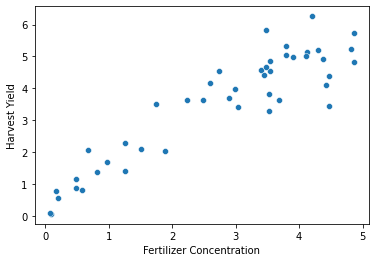

In [3]:
df1 = pd.read_csv('fertilizer.csv')

sns.scatterplot(x="fertCon",y="harvest",data=df1)
plt.xlabel("Fertilizer Concentration")
plt.ylabel("Harvest Yield")

### Question 2 ( / 12 pts)
Write a function called polyRegPredict(b,x) which returns the prediction of a polynomial regression model on x. The length of b should indicate the order of the model. If b has length 1, the model should be of order 0 (constant). If b has length 2, it should be a linear regression model, if b has length 3, it should be quadratic model (order 2). Call your function with x=np.linspace(-5,5,10) and b=[-10,-4,1]. Plot the result as a scatter plot.

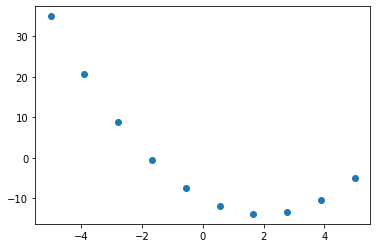

In [4]:
def polyRegPredict(b,x):
    yp=np.zeros(x.shape)
    for i in range(len(b)):
        yp=yp+b[i]*(x**i)
    return yp

pred=polyRegPredict([-10,-4,1],np.linspace(-5,5,10))
plt.scatter(np.linspace(-5,5,10),pred)
plt.show()

### Question 3 ( / 18 pts)
Modify you function simpleRegLossRSS from HW7 to become function polyRegLossRSS, which calculates the residual sum of squares and the derivatives for the polyinomial regression. Also change your function plotPrediction to use polyRegPredict, instead of modelPredict. Then modify your simpleRegFit function to become polyRegFit(x,y,order), which takes the order of the polynomial fit as a third input argument. Call the function for a quadratic fit the harvest yield (y) as a function of fertilizer concentration (x).

R2 is 0.8749779836182523


array([ 0.1072418 ,  1.83439932, -0.1675627 ])

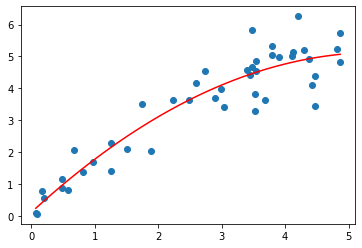

In [5]:
def polyRegLossRSS(b,x,y):
    predY = polyRegPredict(b,x)
    res = y-predY
    rss = sum(res**2)
    grad=np.zeros(len(b))
    for i in range(len(b)):
        grad[i]=-2*np.sum((x**i)*res)
    return (rss,grad)

def plotPrediction(b,x,y,graph=True):
    xp = np.linspace(min(x),max(x),num=50)
    yp = polyRegPredict(b,xp)
    if graph:
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x,y)
        ax.plot(xp,yp,'r')
    return yp

def polyRegFit(x,y,order,output=True):
    RESULT = so.minimize(polyRegLossRSS, np.zeros((order+1,1)), args = (x,y), jac = True)
    plotPrediction(RESULT.x,x,y,output)
    TSS = sum((y - np.mean(y))**2)
    RSS,grad = polyRegLossRSS(RESULT.x,x,y)
    R2 = 1-(RSS/TSS)
    if output:
        print('R2 is',R2)
    return RESULT.x
    
polyRegFit(df1.fertCon,df1.harvest,2)

### Question 4 ( / 5 pts)
Call you polyRegression function to produce a polynomial fit of order 8. What is the R2? 

R2 is 0.9005923245190869


array([ 4.16162073e-01, -3.78282120e+00,  2.63109422e+01, -4.82474403e+01,
        4.23940599e+01, -1.99300845e+01,  5.13629911e+00, -6.83983732e-01,
        3.67807609e-02])

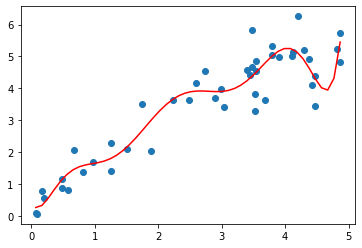

In [6]:
polyRegFit(df1.fertCon,df1.harvest,8)

## Task 3: Cross-validation of models ( / 40 pts)
### Question 1 ( / 20 pts)
Write a function leaveOneOutCV, which takes as inputs x and y, a function to be called for the fit, optional input arguments for the fit, and a function to be called for prediction. The function should then perform leave-on-out crossvalidation and calculate the cross-validated R2. It should then fit the model to all data and calculate the fitted R2. The sketch of the function can be found in the lecture. Call the function to get a cross-validated R2 for a polynomial fit of order 8. How much lower is the crossvalidated R2 than the fitted R2? 

In [43]:
def leaveOneOutCV(x,y,fitFunc,predFunc,fitArgs=()):
    yp=np.zeros(len(x))
    for i in range(len(x)):
        ind = np.arange(len(x))
        ind = np.delete(ind,i)
        xtrain = x[ind]
        ytrain = y[ind]
        b = fitFunc(xtrain,ytrain,fitArgs,output=False)
        yp[i]=predFunc(b,x[i])
    TSS = sum((y - np.mean(y))**2)
    RSScv = sum((y-yp)**2)
    R2cv = 1-(RSScv/TSS)
    b = fitFunc(x,y,fitArgs,output=False)
    yf = predFunc(b,x)
    RSS = sum((y-yf)**2)
    R2 = 1-(RSS/TSS)
    return R2,R2cv
R2,R2cv = leaveOneOutCV(df1.fertCon,df1.harvest,polyRegFit,polyRegPredict,fitArgs=8)
print('R2cv is',R2cv,'and R2 is',R2)

R2cv is 0.8509576342461673 and R2 is 0.9005923245190869


The cross validated R2 is about 0.05 less than the fitted R2.

### Question 2 ( / 20 pts)
Run a loop from model order 0 (constant) to model order 8. For each polynomial model order, call you function leaveOneOutCV to get the crossvalidated R2 and the normal R2 for each model order. Make a plot where you show the line for the crossvalidated R2 and R2 as a function of model order. When is the best crossvalidated R2 reached? When does the model start overfitting? Which model would you use to make a prediction for an unobserved data point? 

R2cv is -0.045971074380165344 and R2 is -2.220446049250313e-16 for order 0
R2cv is 0.8281937042300891 and R2 is 0.8424280402361713 for order 1
R2cv is 0.8591929622200054 and R2 is 0.8749779836182523 for order 2
R2cv is 0.8536772943301223 and R2 is 0.8753913951668624 for order 3
R2cv is 0.8479482333974127 and R2 is 0.875398569735774 for order 4
R2cv is 0.8431176318551228 and R2 is 0.8775287083801129 for order 5
R2cv is 0.8358563594008307 and R2 is 0.8776778526026783 for order 6
R2cv is 0.842066078539536 and R2 is 0.8884139314238257 for order 7


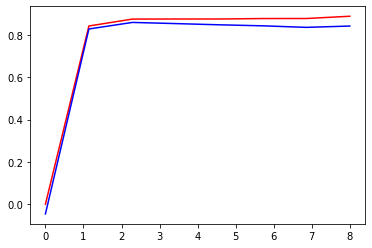

In [45]:
R2points =  np.zeros(8)
R2cvpoints =  np.zeros(8)
for i in range(8):
    R2,R2cv = leaveOneOutCV(df1.fertCon,df1.harvest,polyRegFit,polyRegPredict,fitArgs=i)
    R2points[i]=R2
    R2cvpoints[i]=R2cv
    print('R2cv is',R2cv,'and R2 is',R2,'for order',i)

xp = np.linspace(0,8,num=8)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(xp,R2points,'r')
ax.plot(xp,R2cvpoints,'b')

>The model starts overfitting at order 3 (down to 0.8536 from 0.859), so I would use order 2. Also, the fitted model seems to work better than the cross validated model.